##### QUESTION 1 ####

In [ ]:

## Step 1: Import the necessary libraries

import pandas as pd


In [ ]:
## Step 2: Import the dataset from the provided address - (https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user)

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(url, sep='|')



In [ ]:
## Step 3: Assign it to a variable called users
import pandas as pd
from io import StringIO

data = """
user_id|age|gender|occupation|zip_code
1|24|M|technician|85711
2|53|F|other|94043
3|23|M|writer|32067
4|24|M|technician|43537
5|33|F|other|15213
6|42|M|executive|98101
7|57|M|administrator|91344
8|36|M|administrator|05201
9|29|M|student|01002
10|53|M|lawyer|90703
11|39|F|other|30329
12|28|F|other|06405
13|47|M|educator|29206
14|45|M|scientist|55106
15|49|F|educator|97301
16|21|M|entertainment|10309
17|30|M|programmer|06355
18|35|F|other|37212
19|40|M|librarian|02138
20|42|F|homemaker|95660
... (include the rest of your data here)
"""


users = pd.read_csv(StringIO(data), delimiter='|')

print(users)


In [150]:
## Step 4: Discover the mean age per occupation
mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print(mean_age_per_occupation)


occupation
administrator    46.5
educator         48.0
entertainment    21.0
executive        42.0
homemaker        42.0
lawyer           53.0
librarian        40.0
other            37.6
programmer       30.0
scientist        45.0
student          29.0
technician       24.0
writer           23.0
Name: age, dtype: float64


In [151]:
## Step 5: Discover the Male ratio per occupation and sort it from the most to the least


#  calculate the male ratio per occupation
male_ratio_per_occupation = users[users['gender'] == 'M'].groupby('occupation').size() / users.groupby('occupation').size()


male_ratio_per_occupation_sorted = male_ratio_per_occupation.sort_values(ascending=False)
print(male_ratio_per_occupation_sorted)


occupation
administrator    1.0
entertainment    1.0
executive        1.0
lawyer           1.0
librarian        1.0
programmer       1.0
scientist        1.0
student          1.0
technician       1.0
writer           1.0
educator         0.5
homemaker        NaN
other            NaN
dtype: float64


In [152]:
## Step 6: For each occupation, calculate the minimum and maximum ages
min_max_age_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])
print(min_max_age_per_occupation)


                min   max
occupation               
administrator  36.0  57.0
educator       47.0  49.0
entertainment  21.0  21.0
executive      42.0  42.0
homemaker      42.0  42.0
lawyer         53.0  53.0
librarian      40.0  40.0
other          28.0  53.0
programmer     30.0  30.0
scientist      45.0  45.0
student        29.0  29.0
technician     24.0  24.0
writer         23.0  23.0


In [153]:
## Step 7: For each combination of occupation and sex, calculate the mean age
mean_age_per_occupation_sex = users.groupby(['occupation', 'gender'])['age'].mean()
print(mean_age_per_occupation_sex)


occupation     gender
administrator  M         46.5
educator       F         49.0
               M         47.0
entertainment  M         21.0
executive      M         42.0
homemaker      F         42.0
lawyer         M         53.0
librarian      M         40.0
other          F         37.6
programmer     M         30.0
scientist      M         45.0
student        M         29.0
technician     M         24.0
writer         M         23.0
Name: age, dtype: float64


In [154]:
## Step 8: For each occupation, present the percentage of women and men
# Count the number of men and women per occupation
gender_count_per_occupation = users.groupby(['occupation', 'gender']).size().unstack().fillna(0)

# Calculate the total count per occupation
total_count_per_occupation = gender_count_per_occupation.sum(axis=1)

# Calculate the percentage
gender_percentage_per_occupation = gender_count_per_occupation.div(total_count_per_occupation, axis=0) * 100
print(gender_percentage_per_occupation)


gender             F      M
occupation                 
administrator    0.0  100.0
educator        50.0   50.0
entertainment    0.0  100.0
executive        0.0  100.0
homemaker      100.0    0.0
lawyer           0.0  100.0
librarian        0.0  100.0
other          100.0    0.0
programmer       0.0  100.0
scientist        0.0  100.0
student          0.0  100.0
technician       0.0  100.0
writer           0.0  100.0


##### QUESTION 2 ####

In [156]:


## Step 1. Import the necessary libraries 
import pandas as pd

In [157]:
## Step 2. Import the dataset - https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv
##Step 3. Assign it to a variable called euro12
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"  # Replace with your dataset URL or path
euro12 = pd.read_csv(url)

In [158]:
## Step 4. Select only the Goal column
goals = euro12['Goals']
print(goals)

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


In [159]:
## Step 5. How many team participated in the Euro2012?
num_teams = euro12.shape[0]
print("Number of teams:", num_teams)

Number of teams: 16


In [160]:
## Step 6. What is the number of columns in the dataset?
num_teams = euro12.shape[0]
print("Number of teams:", num_teams)

Number of teams: 16


In [161]:
## Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print(discipline.head())

             Team  Yellow Cards  Red Cards
0         Croatia             9          0
1  Czech Republic             7          0
2         Denmark             4          0
3         England             5          0
4          France             6          0


In [162]:
## Step 8. Sort the teams by Red Cards, then to Yellow Cards
discipline_sorted = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[False, False])
print(discipline_sorted)

                   Team  Yellow Cards  Red Cards
6                Greece             9          1
9                Poland             7          1
11  Republic of Ireland             6          1
7                 Italy            16          0
10             Portugal            12          0
13                Spain            11          0
0               Croatia             9          0
1        Czech Republic             7          0
14               Sweden             7          0
4                France             6          0
12               Russia             6          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
2               Denmark             4          0
5               Germany             4          0


In [163]:
## Step 9. Calculate the mean Yellow Cards given per Team
mean_yellow_cards = euro12['Yellow Cards'].mean()
print("Mean Yellow Cards:", mean_yellow_cards)

Mean Yellow Cards: 7.4375


In [164]:
## Step 10. Filter teams that scored more than 6 goalsStep G
teams_high_goals = euro12[euro12['Goals'] > 6]
print(teams_high_goals)

       Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5   Germany     10               32                32             47.8%   
13    Spain     12               42                33             55.9%   

   % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5             15.6%                          80             2              1   
13            16.0%                         100             0              1   

    Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                      0  ...          10                 62.6%         63   
13                     0  ...          15                 93.8%        102   

   Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5              49        12             4          0       15        15   
13             83        19            11          0       17        17   

    Players Used  
5             17  
13            18  

[2 rows x 35 c

In [165]:
## 11. Select the teams that start with G
teams_starting_with_g = euro12[euro12['Team'].str.startswith('G')]
print(teams_starting_with_g)

      Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5  Germany     10               32                32             47.8%   
6   Greece      5                8                18             30.7%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5            15.6%                          80             2              1   
6            19.2%                          32             1              1   

   Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                     0  ...          10                 62.6%         63   
6                     1  ...          13                 65.1%         67   

  Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5             49        12             4          0       15        15   
6             48        12             9          1       12        12   

   Players Used  
5            17  
6            20  

[2 rows x 35 columns]


In [166]:
##Step 12. Select the first 7 columns
first_7_columns = euro12.iloc[:, :7]
print(first_7_columns)

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [167]:
##Step 13. Select all columns except the last 3
all_except_last_3 = euro12.iloc[:, :-3]
print(all_except_last_3)

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [168]:
##Step 14. Present only the Shooting Accuracy from England, Italy and Russia

shooting_accuracy = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]
print(shooting_accuracy)

       Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


##### QUESTION 3 ####

In [170]:


##Step 1: Import the necessary libraries
import pandas as pd  # For data manipulation
import numpy as np  # For generating random numbers


In [171]:
##Step 2: Create 3 different Series, each of length 100
# Series 1: Random integers between 1 and 4 (inclusive)
series1 = pd.Series(np.random.randint(1, 5, size=100))

# Series 2: Random integers between 1 and 3 (inclusive)
series2 = pd.Series(np.random.randint(1, 4, size=100))

# Series 3: Random integers between 10,000 and 30,000 (inclusive)
series3 = pd.Series(np.random.randint(10000, 30001, size=100))


In [172]:
##Step 3: Create a DataFrame by joining the Series by column
# Combine the three Series into a single DataFrame
df = pd.concat([series1, series2, series3], axis=1)


In [173]:
##Step 4: Change the name of the columns to bedrs, bathrs, price_sqr_meter
# Rename the columns for clarity
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']


In [174]:
##Step 5: Create a one-column DataFrame with the values of the 3 Series and assign it to bigcolumn

# Concatenate the three Series into a single column
bigcolumn = pd.concat([series1, series2, series3], ignore_index=True)

# Convert the resulting Series to a DataFrame
bigcolumn = pd.DataFrame(bigcolumn, columns=['bigcolumn'])


In [175]:
##Step 6: Check if the index only goes until 99

# Check the maximum index value to see if it only goes to 99
print("Max index:", bigcolumn.index.max())  # Expecting output: 299


Max index: 299


In [176]:
##Step 7: Reindex the DataFrame so it goes from 0 to 299
# Ensure the index runs from 0 to 299
bigcolumn = bigcolumn.reindex(range(300))

# Optionally, display the DataFrame to verify
bigcolumn.head(10)  # Show the first 10 rows
bigcolumn.tail(10)  # Show the last 10 rows


,bigcolumn
290,23942
291,11699
292,23360
293,26303
294,11410
295,29298
296,14716
297,26759
298,16710
299,11859


##### QUESTION 4 ####

In [178]:


## Step 1: Import the necessary libraries

import pandas as pd
import numpy as np

data_dict = {
    'Yr': [1961, 1961, 1961],
    'Mo': [1, 1, 1],
    'Dy': [1, 2, 3],
    'RPT': [15.04, 14.71, 18.50],
    'VAL': [14.96, np.nan, 16.88],
    'ROS': [13.17, 10.83, 12.33],
    'KIL': [9.29, 6.50, 10.13],
    'SHA': [np.nan, 12.62, 11.17],
    'BIR': [9.87, 7.67, 6.17],
    'DUB': [13.67, 11.50, 11.25],
    'CLA': [10.25, 10.04, np.nan],
    'MUL': [10.83, 9.79, 8.50],
    'CLO': [12.58, 9.67, 7.67],
    'BEL': [18.50, 17.54, 12.75],
    'MAL': [15.04, 13.83, 12.71]
}

# Convert to DataFrame
df = pd.DataFrame(data_dict)

# Save to a text file
df.to_csv('wind.txt', sep=' ', index=False)

In [179]:
### Step 2: Import/load the dataset from the  file

import pandas as pd

# Load the dataset
try:
    data = pd.read_csv('wind.txt', delim_whitespace=True)
    print("File loaded successfully.")
except Exception as e:
    print(f"Error loading file: {e}")

File loaded successfully.


In [180]:
## Assign column names
print(data.head())
print(data.columns)

     Yr  Mo  Dy    RPT    VAL    ROS    KIL    SHA    BIR    DUB    CLA  \
0  1961   1   1  15.04  14.96  13.17   9.29   9.87  13.67  10.25  10.83   
1  1961   1   2  14.71  10.83   6.50  12.62   7.67  11.50  10.04   9.79   
2  1961   1   3  18.50  16.88  12.33  10.13  11.17   6.17  11.25   8.50   

     MUL    CLO    BEL  MAL  
0  12.58  18.50  15.04  NaN  
1   9.67  17.54  13.83  NaN  
2   7.67  12.75  12.71  NaN  
Index(['Yr', 'Mo', 'Dy', 'RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR', 'DUB',
       'CLA', 'MUL', 'CLO', 'BEL', 'MAL'],
      dtype='object')


#### QUESTION 4 ####

In [182]:


##Step 1: Import the necessary libraries
import pandas as pd
import numpy as np



In [183]:
##Step 2: Import the dataset from the attached file wind.txt
import pandas as pd

# Load the dataset
file_path = "C:\\Users\\HP\\Downloads\\wind.txt"
data = pd.read_csv(file_path, delim_whitespace=True)

# Verify the data types
print(data.dtypes)

# Inspect the first few rows
print(data.head())




Yr       int64
Mo       int64
Dy       int64
RPT    float64
VAL    float64
ROS    float64
KIL    float64
SHA    float64
BIR    float64
DUB    float64
CLA    float64
MUL    float64
CLO    float64
BEL    float64
MAL    float64
dtype: object
   Yr  Mo  Dy    RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
0  61   1   1  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83   
1  61   1   2  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
2  61   1   3  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   
3  61   1   4  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   
4  61   1   5  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92   

     CLO    BEL    MAL  
0  12.58  18.50  15.04  
1   9.67  17.54  13.83  
2   7.67  12.75  12.71  
3   5.88   5.46  10.88  
4  10.34  12.92  11.83  


In [184]:
# Check for missing values
print(data[['Yr', 'Mo', 'Dy']].isna().sum())

# Check for any unexpected values
print(data[['Yr', 'Mo', 'Dy']].describe())


Yr    0
Mo    0
Dy    0
dtype: int64
                Yr           Mo           Dy
count  6574.000000  6574.000000  6574.000000
mean     69.500304     6.523274    15.728628
std       5.188131     3.448871     8.800335
min      61.000000     1.000000     1.000000
25%      65.000000     4.000000     8.000000
50%      69.500000     7.000000    16.000000
75%      74.000000    10.000000    23.000000
max      78.000000    12.000000    31.000000


In [185]:
import pandas as pd

# Load the dataset
file_path = "C:\\Users\\HP\\Downloads\\wind.txt"
data = pd.read_csv(file_path, delim_whitespace=True)

# Convert two-digit year to four-digit year (assuming 1900s for this example)
data['Yr'] = data['Yr'].apply(lambda x: x + 1900 if x < 100 else x)

# Create a new 'Date' column by combining Yr, Mo, and Dy with the correct format
data['Date'] = pd.to_datetime(data[['Yr', 'Mo', 'Dy']].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d', errors='coerce')

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Drop the original Yr, Mo, and Dy columns as they're no longer needed
data.drop(columns=['Yr', 'Mo', 'Dy'], inplace=True)

# Verify the changes
print(data.head())


              RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
Date                                                                       
1961-01-01  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83   
1961-01-02  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
1961-01-03  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   
1961-01-04  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   
1961-01-05  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92   

              CLO    BEL    MAL  
Date                             
1961-01-01  12.58  18.50  15.04  
1961-01-02   9.67  17.54  13.83  
1961-01-03   7.67  12.75  12.71  
1961-01-04   5.88   5.46  10.88  
1961-01-05  10.34  12.92  11.83  


In [186]:
##Step 4: Year 2061? Do we really have data from this year? Create a function to fix it and apply it
def fix_year(year):
    if year > 2024:  # Assuming the dataset should not have future years
        return np.nan
    return year

data['Yr'] = data.index.year
data['Yr'] = data['Yr'].apply(fix_year)
data.dropna(subset=['Yr'], inplace=True)
data.index = pd.to_datetime(data.index.year.astype(str) + data.index.strftime('-%m-%d'))


In [187]:
##Step 5: Set the right dates as the index
data.index = pd.to_datetime(data.index)


In [188]:
##Step 6: Compute how many values are missing for each location over the entire record
missing_values = data.isna().sum()
print("Missing values for each location:")
print(missing_values)


Missing values for each location:
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
Yr     0
dtype: int64


In [189]:
##Step 7: Compute how many non-missing values there are in total
non_missing_values = data.notna().sum().sum()
print("Total number of non-missing values:")
print(non_missing_values)


Total number of non-missing values:
85431


In [190]:
##Step 8: Calculate the mean windspeeds of the windspeeds over all the locations and all the times
mean_windspeed = data.mean().mean()
print("Mean windspeed over all locations and times:")
print(mean_windspeed)


Mean windspeed over all locations and times:
160.94123788914024


In [191]:
##Step 9: Create a DataFrame called loc_stats and calculate the min, max, mean, and standard deviations of the windspeeds at each location over all the days
loc_stats = pd.DataFrame({
    'min': data.min(),
    'max': data.max(),
    'mean': data.mean(),
    'std': data.std()
})
print("Location statistics:")
print(loc_stats)


Location statistics:
         min      max         mean       std
RPT     0.67    35.80    12.362987  5.618413
VAL     0.21    33.37    10.644314  5.267356
ROS     1.50    33.84    11.660526  5.008450
KIL     0.00    28.46     6.306468  3.605811
SHA     0.13    37.54    10.455834  4.936125
BIR     0.00    26.16     7.092254  3.968683
DUB     0.00    30.37     9.797343  4.977555
CLA     0.00    31.08     8.495053  4.499449
MUL     0.00    25.88     8.493590  4.166872
CLO     0.04    28.21     8.707332  4.503954
BEL     0.13    42.38    13.121007  5.835037
MAL     0.67    42.54    15.599079  6.699794
Yr   1961.00  1978.00  1969.500304  5.188131


In [192]:
##Step 10: Create a DataFrame called day_stats and calculate the min, max, mean, and standard deviations of the windspeeds across all the locations at each day
day_stats = pd.DataFrame({
    'min': data.min(axis=1),
    'max': data.max(axis=1),
    'mean': data.mean(axis=1),
    'std': data.std(axis=1)
})
print("Day statistics:")
print(day_stats)


Day statistics:
             min     max        mean         std
Date                                            
1961-01-01  9.29  1961.0  175.350000  562.340291
1961-01-02  6.50  1961.0  173.808333  562.827626
1961-01-03  6.17  1961.0  174.088333  562.742186
1961-01-04  1.79  1961.0  156.956154  542.056364
1961-01-05  6.17  1961.0  160.658462  540.940377
...          ...     ...         ...         ...
1978-12-27  8.08  1978.0  167.576923  544.016595
1978-12-28  5.00  1978.0  166.138462  544.475652
1978-12-29  8.71  1978.0  165.898462  544.496649
1978-12-30  9.13  1978.0  166.339231  544.362162
1978-12-31  9.59  1978.0  166.371538  544.353990

[6574 rows x 4 columns]


In [193]:
##Step 11: Find the average windspeed in January for each location
# Create a month filter for January
january_data = data[data.index.month == 1]
average_january_windspeed = january_data.groupby(january_data.index.year).mean()
print("Average windspeed in January for each location:")
print(average_january_windspeed)


Average windspeed in January for each location:
            RPT        VAL        ROS        KIL        SHA        BIR  \
Date                                                                     
1961  14.841333  11.988333  13.431613   7.736774  11.072759   8.588065   
1962  14.783871  13.160323  12.591935   7.538065  11.779677   8.720000   
1963  14.868387  11.112903  15.121613   6.635806  11.080645   7.835484   
1964  12.661290  11.818387  11.741290   6.953548  11.400645   6.865806   
1965  15.741613  15.546774  15.274194   8.258387  13.588065   9.251290   
1966  15.834839  13.283226  15.136452   8.659355  12.968065   9.163548   
1967  13.736129  11.470968  11.537419   6.928065  10.833548   6.730323   
1968  14.733226  12.829032  12.294194   7.849032  12.262581   7.133226   
1969  12.824839  12.113871  11.403871   6.708710  10.557097   5.926452   
1970  13.152581  11.731935  13.083871   5.810968   9.507742   8.040323   
1971  15.098065  13.398387  13.080000   6.364194  11.342258   7.

In [194]:
##Step 12: Downsample the record to a yearly frequency for each location
yearly_data = data.resample('Y').mean()
print("Yearly data:")
print(yearly_data)


Yearly data:
                  RPT        VAL        ROS       KIL        SHA       BIR  \
Date                                                                         
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-12-31  11.273123   9.095178  11.088329  5.2415

In [195]:
##Step 13: Downsample the record to a monthly frequency for each location
monthly_data = data.resample('M').mean()
print("Monthly data:")
print(monthly_data)


Monthly data:
                  RPT        VAL        ROS       KIL        SHA        BIR  \
Date                                                                          
1961-01-31  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02-28  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03-31  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-31   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...               ...        ...        ...       ...        ...        ...   
1978-08-31   9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09-30  10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10-31   9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11-30  16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1978-12-31  16.175484  13.748065  15.6

In [196]:
##Step 14: Downsample the record to a weekly frequency for each location
weekly_data = data.resample('W').mean()
print("Weekly data:")
print(weekly_data)


Weekly data:
                  RPT        VAL        ROS        KIL        SHA        BIR  \
Date                                                                           
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   
...               ...        ...        ...        ...        ...        ...   
1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   8.618571   
1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143  12.774286   
1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   7.272857   
1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   6.290000   
1978-12-31  14.951429  11.8

In [197]:
##Step 15: Calculate the min, max, mean, and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2, 1961) for the first 52 weeks
# Ensure that the first week starts on January 2, 1961
weekly_data_52_weeks = data.resample('W').agg(['min', 'max', 'mean', 'std']).loc[:'1961-12-31']
print("Weekly statistics for the first 52 weeks:")
print(weekly_data_52_weeks)


Weekly statistics for the first 52 weeks:
              RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Date                                                                     
1961-01-01  15.04  15.04  15.040000       NaN  14.96  14.96  14.960000   
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429

#### QUESTION 5 #####

In [199]:

# Step 1: Import the necessary libraries
import pandas as pd


In [200]:
# Step 2: Import the dataset from the provided URL
# Step 3: Assign it to a variable called chipo
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')

In [201]:
# Step 4: See the first 10 entries
print("First 10 entries:")
print(chipo.head(10))

First 10 entries:
   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3            

In [202]:
# Step 5: What is the number of observations in the dataset?
num_observations = chipo.shape[0]
print(f"Number of observations: {num_observations}")

Number of observations: 4622


In [203]:
# Step 6: What is the number of columns in the dataset?
num_columns = chipo.shape[1]
print(f"Number of columns: {num_columns}")

Number of columns: 5


In [204]:
# Step 7: Print the name of all the columns
print("Column names:")
print(chipo.columns.tolist())


Column names:
['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


In [205]:
# Step 8: How is the dataset indexed?
print("Dataset index:")
print(chipo.index)

Dataset index:
RangeIndex(start=0, stop=4622, step=1)


In [206]:
# Step 9: Which was the most-ordered item?
most_ordered_item = chipo['item_name'].value_counts().idxmax()
print(f"Most ordered item: {most_ordered_item}")

Most ordered item: Chicken Bowl


In [207]:
# Step 10: For the most-ordered item, how many items were ordered?
most_ordered_item_count = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
print(f"Total number of '{most_ordered_item}' items ordered: {most_ordered_item_count}")

Total number of 'Chicken Bowl' items ordered: 761


In [208]:
# Step 11: What was the most ordered item in the choice_description column?
most_ordered_choice_description = chipo['choice_description'].value_counts().idxmax()
print(f"Most ordered item in choice_description column: {most_ordered_choice_description}")

Most ordered item in choice_description column: [Diet Coke]


In [209]:
# Step 12: How many items were ordered in total?
total_items_ordered = chipo['quantity'].sum()
print(f"Total number of items ordered: {total_items_ordered}")


Total number of items ordered: 4972


In [210]:
# Step 13:
# Turn the item price into a float
chipo['item_price'] = chipo['item_price'].replace('[\$,]', '', regex=True).astype(float)

In [211]:
# Check the item price type
print(f"Item price type: {chipo['item_price'].dtype}")

Item price type: float64


In [212]:
# Create a lambda function and change the type of item price
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x))

In [213]:
# Check the item price type again
print(f"Item price type after lambda function: {chipo['item_price'].dtype}")

Item price type after lambda function: float64


In [214]:
# Step 14: How much was the revenue for the period in the dataset?
revenue = (chipo['item_price'] * chipo['quantity']).sum()
print(f"Total revenue: ${revenue:.2f}")

Total revenue: $39237.02


In [215]:
# Step 15: How many orders were made in the period?
num_orders = chipo['order_id'].nunique()
print(f"Total number of orders: {num_orders}")

Total number of orders: 1834


In [216]:
# Step 16: What is the average revenue amount per order?
average_revenue_per_order = revenue / num_orders
print(f"Average revenue amount per order: ${average_revenue_per_order:.2f}")

Average revenue amount per order: $21.39


In [217]:
# Step 17: How many different items are sold?
num_different_items_sold = chipo['item_name'].nunique()
print(f"Number of different items sold: {num_different_items_sold}")

Number of different items sold: 50


#### QUESTION 6 ######

   Year  Marriages  Divorces  Population  Marriages_per_1000  \
0  1867   357000.0   10000.0    36970000                 9.7   
1  1868   345000.0   10000.0    37885000                 9.1   
2  1869   348000.0   11000.0    38870000                 9.0   
3  1870   352000.0   11000.0    39905000                 8.8   
4  1871   359000.0   12000.0    41010000                 8.8   

   Divorces_per_1000  
0                0.3  
1                0.3  
2                0.3  
3                0.3  
4                0.3  


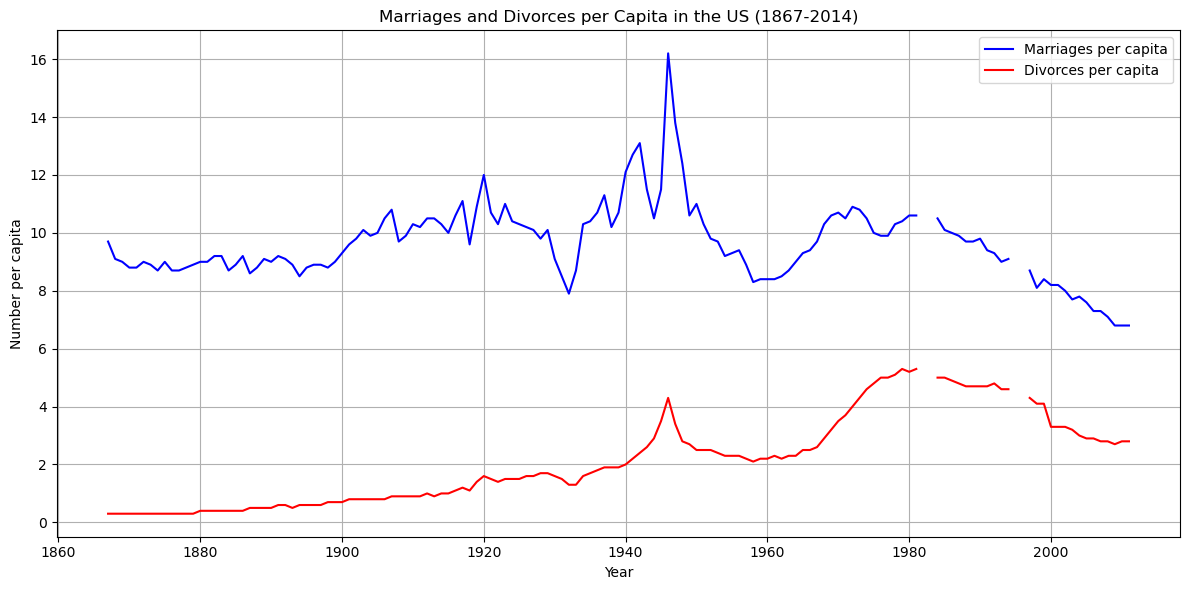

In [219]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading the CSV file from the specified path
file_path = r'C:\Users\HP\Downloads\us-marriages-divorces-1867-2014.csv'
data = pd.read_csv(file_path)

# Checking the first few rows to ensure the data is read correctly
print(data.head())

# Assigning the values to the variables
years = data['Year']
marriages = data['Marriages_per_1000']
divorces = data['Divorces_per_1000']

# Plotting in the graph
plt.figure(figsize=(12, 6))  # Optional: Set figure size for better readability
plt.plot(years, marriages, label='Marriages per capita', color='blue')
plt.plot(years, divorces, label='Divorces per capita', color='red')

# Labeling
plt.xlabel('Year')
plt.ylabel('Number per capita')

# Giving Title
plt.title('Marriages and Divorces per Capita in the US (1867-2014)')

# Showing the legends on the visual
plt.legend()
plt.grid(True)  # Optional: Add grid for better readability
plt.tight_layout()  # Optional: Adjust layout to fit labels
plt.show()


#### QUESTION 7 #####

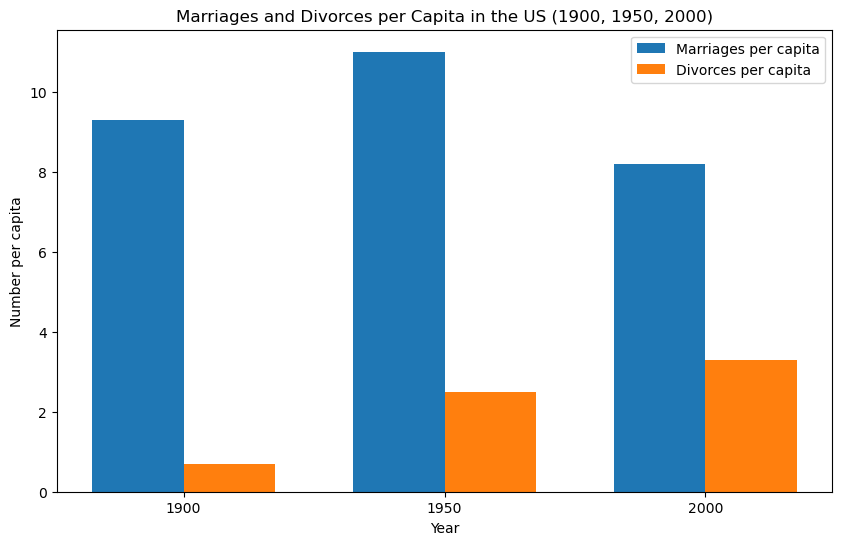

In [221]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Reading the file with the correct path
data = pd.read_csv(r'C:\Users\HP\Downloads\us-marriages-divorces-1867-2014.csv')

# Filtering data for the years 1900, 1950, 2000
relevant_data = data[data['Year'].isin([1900, 1950, 2000])]

# Extracting values for plotting
years = relevant_data['Year']
marriages = relevant_data['Marriages_per_1000']
divorces = relevant_data['Divorces_per_1000']

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting marriages and divorces side by side
bar_width = 0.35
index = range(len(years))
bar1 = plt.bar(index, marriages, bar_width, label='Marriages per capita')
bar2 = plt.bar([i + bar_width for i in index], divorces, bar_width, label='Divorces per capita')

# Adding labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Number per capita')
plt.title('Marriages and Divorces per Capita in the US (1900, 1950, 2000)')
plt.xticks([i + bar_width / 2 for i in index], years)
plt.legend()

# Showing the plot
plt.show()


#### QUESTION 8 ####

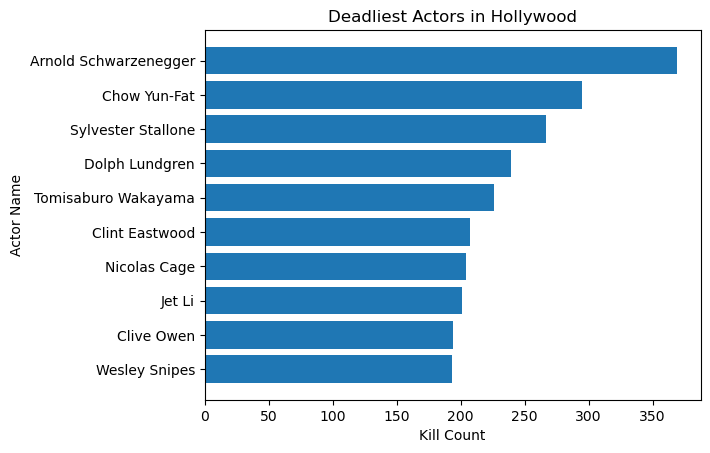

In [223]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Reading the file with the correct path
data = pd.read_csv(r'C:\Users\HP\Downloads\actor_kill_counts.csv')

# Sorting data by 'Count' in ascending order
sorted_data = data.sort_values('Count', ascending=True)

# Extracting variables
actors = sorted_data['Actor']
kill_counts = sorted_data['Count']

# Plotting the horizontal bar chart
plt.barh(actors, kill_counts)

# Labeling
plt.xlabel('Kill Count')
plt.ylabel('Actor Name')

# Giving Title
plt.title('Deadliest Actors in Hollywood')

# Showing the plot
plt.show()


#### QUESTION 9 #####

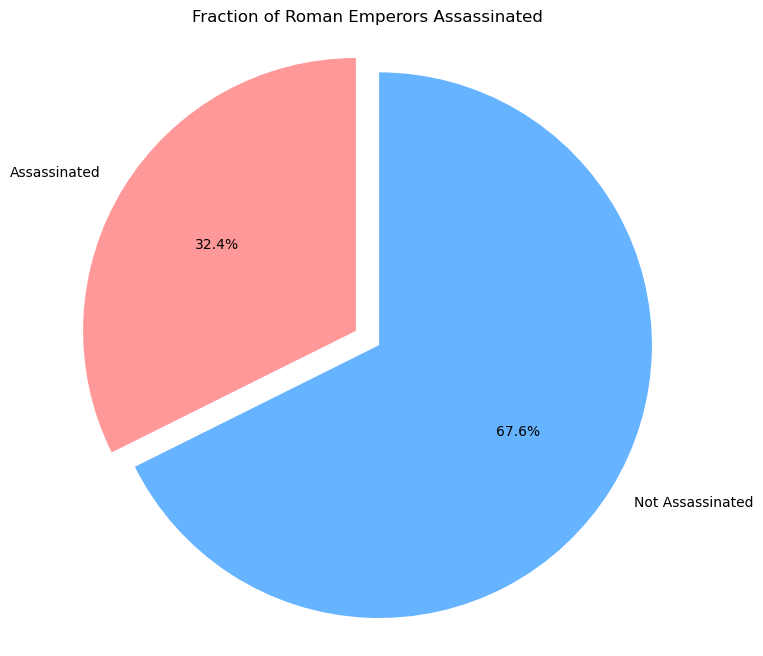

In [225]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading the file
data = pd.read_csv('C:\\Users\\HP\\Downloads\\roman-emperor-reigns.csv')

# Calculating the number of emperors assassinated and the total number
num_assassinated = data['Cause_of_Death'].str.contains('Assassinated').sum()
total_emperors = len(data)

# Finding the fraction of assassinated and non-assassinated
fraction_assassinated = num_assassinated / total_emperors
fraction_not_assassinated = 1 - fraction_assassinated

# Labeling
labels = ['Assassinated', 'Not Assassinated']
sizes = [fraction_assassinated, fraction_not_assassinated]
explode = (0.1, 0)  # explode the 'Assassinated' slice for emphasis

# Plotting the pie chart
plt.figure(figsize=(8, 8))  # Optional: adjust the figure size
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Giving Title
plt.title('Fraction of Roman Emperors Assassinated')
plt.show()


#### QUESTION 10 #####

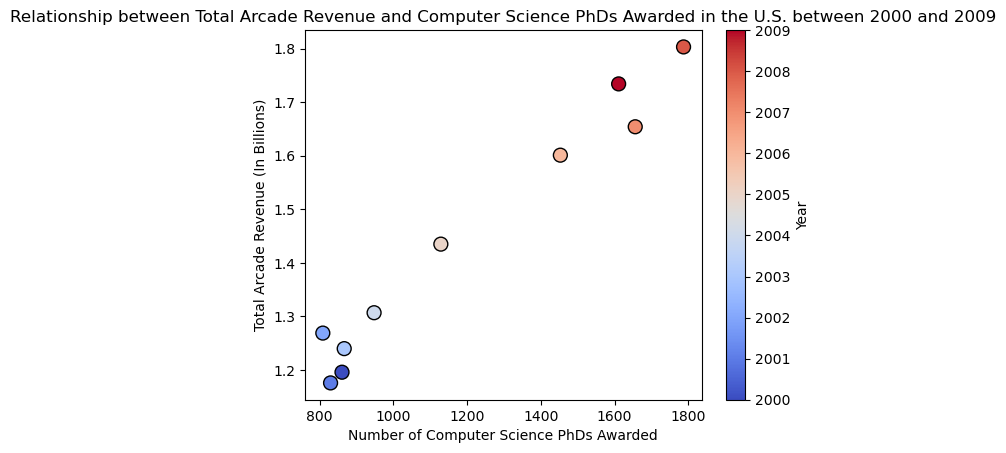

In [227]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading the file
data = pd.read_csv('C:\\Users\\HP\\Downloads\\arcade-revenue-vs-cs-doctorates.csv')

# Assigning the values to the variables
revenue = data['Total Arcade Revenue (billions)']
phds = data['Computer Science Doctorates Awarded (US)']
years = data['Year']

# Create the scatter plot
fig, ax = plt.subplots()
scatter = ax.scatter(phds, revenue, c=years, cmap='coolwarm', s=100, edgecolor='k')

# Labeling
ax.set_xlabel('Number of Computer Science PhDs Awarded')
ax.set_ylabel('Total Arcade Revenue (In Billions)')
ax.set_title('Relationship between Total Arcade Revenue and Computer Science PhDs Awarded in the U.S. between 2000 and 2009')

# Add colorbar and legend
cbar = plt.colorbar(scatter, ax=ax, label='Year')
cbar.set_ticks(range(int(years.min()), int(years.max())+1, 1))

plt.show()
